<a href="https://colab.research.google.com/github/zia207/Deep-Neural-Network-Satellite-Image-Classification-in-Google-Colaboratory-iPython-Note-Book-/blob/master/NoteBook/Machine_Learning/Tree_based/03-01-01-03-tree-based-models-decision-tree-mob-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1xLlN9eEG2IYFBlAuwl53aDVxcBkRnkEw
)

# 1.3 Model-based Recursive Partitioning (MOB)

**Model-based Recursive Partitioning (MOB)**  is a powerful technique for analyzing complex datasets where relationships between variables may vary across different segments of the data. It is particularly useful in fields like epidemiology, finance, and social sciences, where understanding how relationships change across subgroups can provide valuable insights.




## Overview

MOB is a statistical method that combines the strengths of regression modeling and recursive partitioning (e.g., decision trees). It partitions data into subgroups based on covariates, where each subgroup is fitted with a parametric model (e.g., linear regression, logistic regression). MOB is particularly useful for detecting parameter instability in models across different subgroups and capturing heterogeneity in data.

MOB recursively splits the data into segments by testing whether model parameters vary significantly across partitions defined by partitioning variables. It balances model fit within subgroups and ensures that splits are statistically justified. This approach allows for a more nuanced understanding of the relationships between variables, as it can reveal how the effect of an explanatory variable on the response variable changes across different subgroups.


### Key Features of MOB

- `Model-based`: Fits a parametric model to each subgroup.
- `Recursive partitioning`: Splits data based on covariates that cause significant parameter instability.
- `Statistical rigor`: Uses formal statistical tests to decide splits, avoiding overfitting.
- `Flexibility`: Can be applied to various parametric models (e.g., linear, logistic, or generalized linear models).

### How it Works

Below is a step-by-step explanation of how MOB works, with a focus on clarity and conciseness:

1. Specify the Parametric Model

   - Define the parametric model to fit the data (e.g., linear regression: $Y = \beta_0 + \beta_1X + \epsilon$).
   - Identify the response variable ($Y$), explanatory variables ($X$), and potential partitioning variables ($Z$) that may induce parameter instability (e.g., age, gender).

2. Fit the Model to the Entire Dataset

   - Estimate the parameters of the model (e.g., $\beta_0, \beta_1$) using the full dataset.
   - This serves as the baseline model before partitioning.

3. Test for Parameter Instability

   - For each partitioning variable $Z_j$ (e.g., age, gender), perform a statistical test to check if the model parameters vary significantly across different values of $Z_j$.
   - Common tests include fluctuation tests or score-based tests (e.g., generalized M-fluctuation tests).
   - The null hypothesis ($H_0$) is that the parameters are stable across all values of $Z_j$. If $H_0$ is rejected, a split is justified.

4. Select the Partitioning Variable and Split Point

   - Among all partitioning variables, choose the one with the most significant parameter instability (e.g., smallest p-value or largest test statistic).
   - For continuous partitioning variables, select the optimal split point (e.g., age < 30 vs. age ≥ 30) that maximizes the improvement in model fit or minimizes a criterion like AIC/BIC.
   - For categorical variables, splits are based on category groupings.

5. Split the Data

   - Divide the dataset into two (or more) subgroups based on the selected partitioning variable and split point.
   - For example, if age is chosen with a split at 30, create two subsets: one for age < 30 and one for age ≥ 30.

6. Fit Models to Subgroups

   - Fit the specified parametric model to each subgroup separately, estimating new parameters for each.
   - This allows the model to capture heterogeneity in the subgroups.

7. Repeat the Process Recursively

   - For each subgroup, repeat steps 3–6: test for parameter instability, select a partitioning variable and split point, split the data, and fit models.
   - Continue partitioning until no further significant parameter instability is detected (e.g., `p-values` exceed a threshold) or a stopping criterion is met (e.g., minimum subgroup size, maximum tree depth).

8. Apply Stopping Criteria

   - Stop partitioning when:
     - No partitioning variable shows significant parameter instability.
     - The subgroup size is too small (user-defined minimum size).
     - A maximum number of splits or tree depth is reached.
     - Model fit improvements are negligible (e.g., based on A`IC/BIC`).

9. Output the Partitioned Model
   - The final output is a tree-like structure where each terminal node (leaf) represents a subgroup with its own fitted parametric model.
   - Each node includes the estimated parameters and details of the splits (e.g., variable and split point).

10. Interpret and Validate
    - Interpret the tree to understand how covariates influence parameter heterogeneity.
    - Validate the model using techniques like cross-validation or out-of-sample testing to ensure generalizability and avoid overfitting.


The below figure summarizes the workflow of a Model-based Recursive Partitioning (MOB):



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


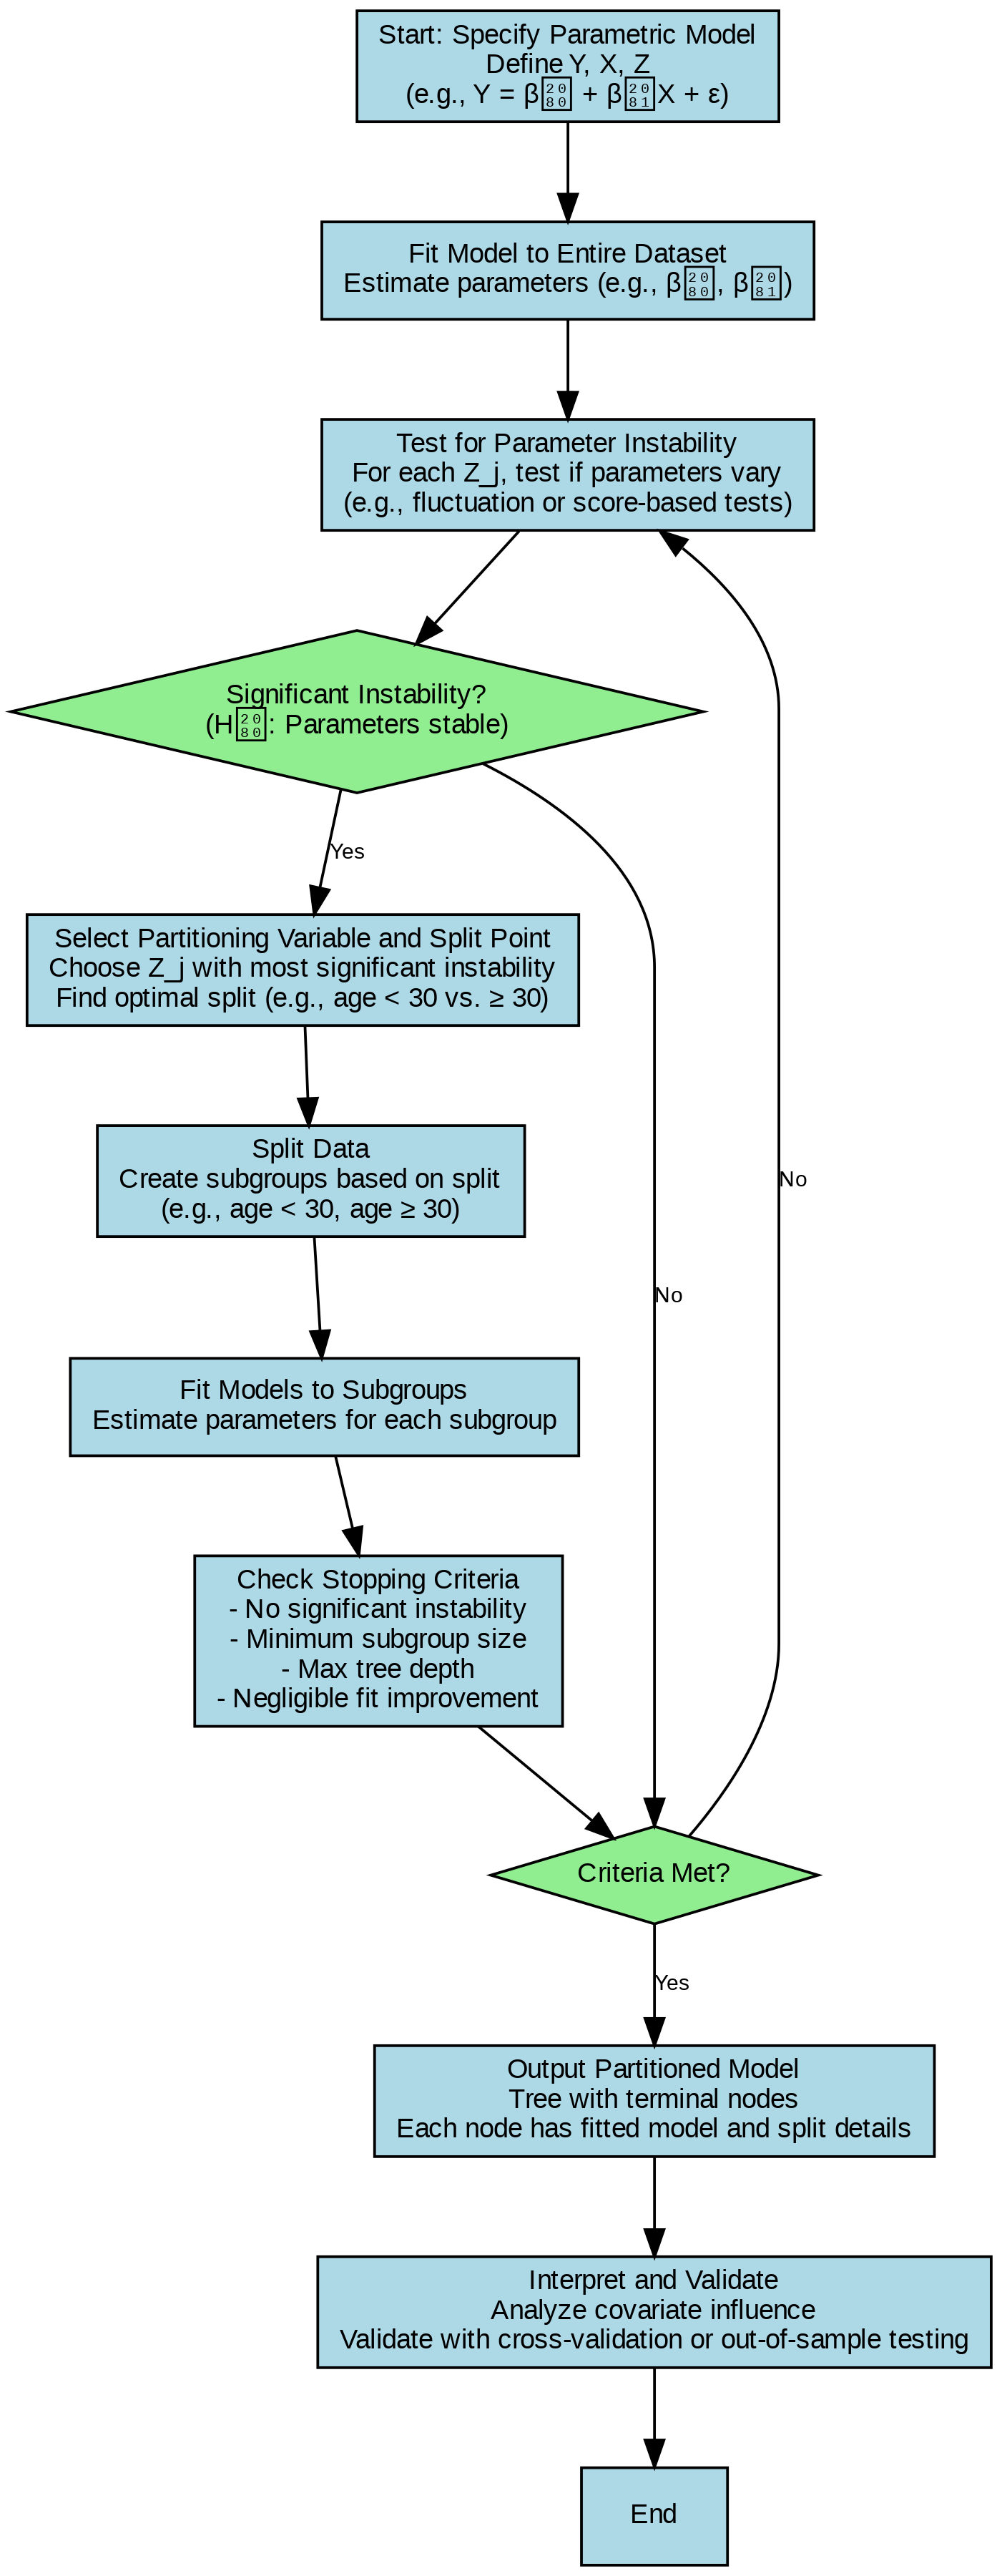

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import Image
Image('/content/drive/MyDrive/R_Website/Machine_Learning/Image/mob_flowchart.png', width=500, height=1000)


### Advantages of MOB

- Captures heterogeneity in model parameters across subgroups.
- Statistically rigorous due to formal hypothesis testing.
- Interpretable tree structure with parametric models in each node.

### Limitations

- Computationally intensive for large datasets or many partitioning variables.
- Assumes the parametric model is correctly specified.
- May overfit if stopping criteria are not stringent.

## Model-based Recursive Partitioning (MOB) in Python

To perform Model-based Recursive Partitioning (MOB) in Python without using {NumPy} and {Pandas} for data handling and {scikit-learn} for linear regression. We’ll follow the steps outlined in your flowchart, using synthetic data with a linear regression model as the parametric model. The implementation will include fitting linear models, testing for parameter instability, selecting split points, and recursively partitioning the data.


### MOB - Ordinary Least Squares (OLS)

Model-based Recursive Partitioning (MOB) with Ordinary Least Squares (OLS) regression is a statistical method that combines the flexibility of recursive partitioning (like decision trees) with parametric modeling (OLS regression) to identify subgroups in the data where the relationship between predictors and the response variable differs. This approach allows for a more nuanced understanding of how predictors influence the response variable across different segments of the data.

Key Concepts of MOB with OLS:

`MOB Framework`:

-   MOB recursively partitions the data into subgroups (nodes) based on partitioning variables, where each subgroup is modeled with a separate OLS regression.

-   It tests for parameter instability in the OLS model across partitioning variables to decide where to split the data.

-   The result is a tree where each terminal node has its own OLS model with potentially different coefficients.

`OLS Regression`:

-   OLS is a linear regression model that minimizes the sum of squared residuals to estimate the relationship between a continuous response variable and one or more predictors.

-   In MOB, OLS is fitted in each node, and the coefficients are allowed to vary across nodes.

In this section of tutorial, we will demonstrate how to use the `mob` function from the {partykit} package to perform Model-based Recursive Partitioning (MOB) with Ordinary Least Squares (OLS) regression. We will use the `BostonHousing` dataset from the `mlbench` package as an example.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings('ignore')

#### Define Functions for MOB with OLS

The Python code implements **Model-based Recursive Partitioning (MOB)** with **OLS regression** for the Boston Housing dataset, creating a tree where each leaf has a unique OLS model. Here's a concise explanation of each function:

1. **`linreg_fit(y, x, **kwargs)`**:
   - **Purpose**: Fits OLS regression for `y` (e.g., `medv`) on `x` (e.g., `lstat`, `rm`).
   - **Process**: Uses `LinearRegression` to compute intercept, coefficients, and residuals.
   - **Output**: Dictionary with `params` (intercept + coefficients), `resid` (residuals), and `model`.
   - **Role**: Fits OLS models in each node.

2. **`instability_test(data, x_cols, y_col, z_col, is_continuous=True)`**:
   - **Purpose**: Tests if OLS parameters vary across splits of `z_col` (partitioning variable).
   - **Process**:
     - Fits OLS on full data, gets parameters and residual variance.
     - **Continuous**: Tests splits (10th–90th percentiles of `z_col`), computes test statistic (`sum((params1 - params2)^2) / resid_var`), picks max, and gets chi-squared p-value.
     - **Categorical**: Tests each category vs. full model, takes max statistic.
     - Applies Bonferroni correction if enabled.
   - **Output**: Dictionary with `stat`, `p_value`, and `split` (split point or `None`).
   - **Role**: Identifies significant parameter instability for splitting.

3. **`mob_split(data, x_cols, y_col, z_cols, alpha=0.05, min_size=40)`**:
   - **Purpose**: Finds the best `z_col` and split point with lowest p-value.
   - **Process**: Iterates over `z_cols`, runs `instability_test`, selects `z_col` with p-value < `alpha`. Splits data into two groups (continuous: `< split`; categorical: `= mode` vs. others). Ensures groups meet `min_size`.
   - **Output**: Dictionary with `z`, `split`, `group1`, `group2`, `split_info` (e.g., `"zn < 20.50"`).
   - **Role**: Determines optimal split for a node.

4. **`mob_recursive(data, x_cols, y_col, z_cols, alpha=0.05, min_size=40, max_depth=3, depth=0)`**:
   - **Purpose**: Builds the MOB tree recursively.
   - **Process**: Stops if `depth >= max_depth` or `len(data) < min_size`, returning a leaf with OLS parameters. Otherwise, calls `mob_split` and recurses on subgroups.
   - **Output**: Dictionary for leaf (`params`, `n`, `depth`, `leaf=True`) or split node (`split_var`, `split_info`, `left`, `right`, `depth`, `leaf=False`).
   - **Role**: Constructs the tree structure.

5. **`print_tree(node, indent="", x_cols=['intercept', 'lstat', 'rm'])`**:
   - **Purpose**: Prints the tree structure.
   - **Process**: For leaves, shows sample size and OLS parameters; for splits, shows split condition and recurses.
   - **Output**: Text output (e.g., `"Leaf: n=50, params=[intercept=10.00, lstat=-2.50, rm=0.30]"`).
   - **Role**: Visualizes the tree.

6. **`predict_tree(node, row, x_cols)`**:
   - **Purpose**: Predicts `y` for a row by traversing the tree.
   - **Process**: At leaves, computes `intercept + sum(coefficients * x_cols)`. At splits, follows the condition (continuous: `< split_val`; categorical: `= split_val`).
   - **Output**: Predicted value (float).
   - **Role**: Generates predictions.

7. **`node_summary(node, node_id, x_cols=['intercept', 'lstat', 'rm'])`**:
   - **Purpose**: Summarizes nodes, showing parameters or split conditions.
   - **Process**: Recursively prints node details (leaf: sample size, parameters; split: condition).
   - **Output**: Text output (e.g., `"Node 7: n=50, params=[...]"`).
   - **Role**: Provides detailed node information.

8. **`extract_coefficients(node, x_cols=['intercept', 'lstat', 'rm'], node_id=1, results=None)`**:
   - **Purpose**: Extracts OLS coefficients from terminal nodes.
   - **Process**: Traverses tree, collects `(node_id, params)` for leaves.
   - **Output**: List of tuples `(node_id, params)`.
   - **Role**: Summarizes model parameters.

9. **`compute_aic(data, x_cols, y_col, tree)`**:
   - **Purpose**: Computes AIC for model evaluation.
   - **Process**: Calculates predictions, residuals, and log-likelihood. Uses `2 * (parameters_per_node * leaf_count) - 2 * log_likelihood`.
   - **Output**: AIC value (float).
   - **Role**: Evaluates model fit.

This code builds a custom MOB tree, tests parameter stability, and evaluates the model, replicating `partykit`’s functionality without external dependencies beyond standard libraries (`numpy`, `pandas`, `scipy`, `scikit-learn`).


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
from pandas.api.types import is_numeric_dtype, is_categorical_dtype # Import necessary functions
import warnings
warnings.filterwarnings('ignore')

# Fit linear regression model
def linreg_fit(y, x, **kwargs):
    model = LinearRegression().fit(x, y)
    return {'params': np.concatenate([[model.intercept_], model.coef_]),
            'resid': y - model.predict(x),
            'model': model}

# Parameter instability test
def instability_test(data, x_cols, y_col, z_col, is_continuous=True):
    X = data[x_cols].values
    y = data[y_col].values
    full_model = linreg_fit(y, X)
    params = full_model['params']
    resid_var = np.var(full_model['resid'], ddof=1)

    if is_continuous:
        z_values = np.sort(data[z_col].unique())
        z_values = z_values[(z_values > data[z_col].quantile(0.1)) &
                           (z_values < data[z_col].quantile(0.9))]
        max_stat = 0
        best_split = None
        for split in z_values:
            group1 = data[data[z_col] < split]
            group2 = data[data[z_col] >= split]
            if len(group1) < mob_ctrl['minsplit'] or len(group2) < mob_ctrl['minsplit']:
                continue
            params1 = linreg_fit(group1[y_col], group1[x_cols])['params']
            params2 = linreg_fit(group2[y_col], group2[x_cols])['params']
            stat = np.sum((params1 - params2) ** 2) / resid_var
            if stat > max_stat:
                max_stat = stat
                best_split = split
        p_value = chi2.sf(max_stat, df=len(x_cols) + 1)  # df = number of params
        if mob_ctrl['bonferroni']:
            p_value *= len(data.columns) - len(x_cols) - 1  # Bonferroni correction
        return {'stat': max_stat, 'p_value': min(p_value, 1), 'split': best_split}
    else:
        categories = data[z_col].unique()
        stats = []
        for cat in categories:
            group = data[data[z_col] == cat]
            if len(group) < mob_ctrl['minsplit']:
                continue
            params_g = linreg_fit(group[y_col], group[x_cols])['params']
            stat = np.sum((params - params_g) ** 2) / resid_var
            stats.append(stat)
        max_stat = max(stats) if stats else 0
        p_value = chi2.sf(max_stat, df=len(x_cols) + 1)
        if mob_ctrl['bonferroni']:
            p_value *= len(data.columns) - len(x_cols) - 1
        return {'stat': max_stat, 'p_value': min(p_value, 1), 'split': None}

# MOB split function
def mob_split(data, x_cols, y_col, z_cols, alpha=0.05, min_size=40):
    best_z = None
    best_stat = 0
    best_p = 1
    best_split = None
    for z_col in z_cols:
        is_continuous = is_numeric_dtype(data[z_col])  # Use pandas is_numeric_dtype
        test = instability_test(data, x_cols, y_col, z_col, is_continuous)
        if mob_ctrl['verbose']:
            print(f"Testing {z_col}: p-value={test['p_value']:.4f}, stat={test['p_value']:.4f}")
        if test['p_value'] < best_p:
            best_p = test['p_value']
            best_stat = test['stat']
            best_z = z_col
            best_split = test['split']
    if best_p >= alpha or best_z is None:
        return {'z': None, 'split': None, 'group1': None, 'group2': None, 'split_info': None}
    if is_numeric_dtype(data[best_z]):  # Consistent check
        group1 = data[data[best_z] < best_split]
        group2 = data[data[best_z] >= best_split]
        split_info = f"{best_z} < {best_split:.2f}"
    else:
        mode_z = data[best_z].mode().iloc[0]
        group1 = data[data[best_z] == mode_z]
        group2 = data[data[best_z] != mode_z]
        split_info = f"{best_z} = {mode_z}"
    if len(group1) < min_size or len(group2) < min_size:
        return {'z': None, 'split': None, 'group1': None, 'group2': None, 'split_info': None}
    return {'z': best_z, 'split': best_split, 'group1': group1, 'group2': group2, 'split_info': split_info}

# Recursive MOB function (unchanged, included for completeness)
def mob_recursive(data, x_cols, y_col, z_cols, alpha=0.05, min_size=40, max_depth=3, depth=0):
    if depth >= max_depth or len(data) < min_size:
        model = linreg_fit(data[y_col], data[x_cols])
        return {'params': model['params'], 'n': len(data), 'depth': depth, 'leaf': True}
    split_result = mob_split(data, x_cols, y_col, z_cols, alpha, min_size)
    if split_result['z'] is None:
        model = linreg_fit(data[y_col], data[x_cols])
        return {'params': model['params'], 'n': len(data), 'depth': depth, 'leaf': True}
    left = mob_recursive(split_result['group1'], x_cols, y_col, z_cols, alpha, min_size, max_depth, depth + 1)
    right = mob_recursive(split_result['group2'], x_cols, y_col, z_cols, alpha, min_size, max_depth, depth + 1)
    return {'split_var': split_result['z'], 'split_info': split_result['split_info'],
            'left': left, 'right': right, 'depth': depth, 'leaf': False}

# Print tree structure
def print_tree(node, indent="", x_cols=['intercept', 'lstat', 'rm']):
    if node['leaf']:
        params_str = ", ".join([f"{col}={val:.2f}" for col, val in zip(x_cols, node['params'])])
        print(f"{indent}Leaf: n={node['n']}, params=[{params_str}]")
    else:
        print(f"{indent}Split: {node['split_info']}")
        print_tree(node['left'], indent + "  ", x_cols)
        print_tree(node['right'], indent + "  ", x_cols)

# Prediction function
def predict_tree(node, row, x_cols):
    if node['leaf']:
        return node['params'][0] + np.sum(node['params'][1:] * row[x_cols].values)
    if np.issubdtype(type(row[node['split_var']]), np.number):
        split_val = float(node['split_info'].split('<')[-1])
        if row[node['split_var']] < split_val:
            return predict_tree(node['left'], row, x_cols)
        else:
            return predict_tree(node['right'], row, x_cols)
    else:
        split_val = node['split_info'].split('=')[-1].strip()
        if str(row[node['split_var']]) == split_val:
            return predict_tree(node['left'], row, x_cols)
        else:
            return predict_tree(node['right'], row, x_cols)

# Node summary
def node_summary(node, node_id, x_cols=['intercept', 'lstat', 'rm']):
    if 'leaf' in node and node['leaf']:
        params_str = ", ".join([f"{col}={val:.2f}" for col, val in zip(x_cols, node['params'])])
        print(f"Node {node_id}: n={node['n']}, params=[{params_str}]")
    else:
        print(f"Node {node_id}: Split on {node['split_info']}")
        node_summary(node['left'], node_id * 2, x_cols)
        node_summary(node['right'], node_id * 2 + 1, x_cols)

# Extract coefficients for terminal nodes
def extract_coefficients(node, x_cols=['intercept', 'lstat', 'rm'], node_id=1, results=None):
    if results is None:
        results = []
    if node['leaf']:
        results.append((node_id, node['params']))
    else:
        extract_coefficients(node['left'], x_cols, node_id * 2, results)
        extract_coefficients(node['right'], x_cols, node_id * 2 + 1, results)
    return results

# Compute AIC (simplified)
def compute_aic(data, x_cols, y_col, tree):
    predictions = data.apply(lambda row: predict_tree(tree, row, x_cols), axis=1)
    resid = data[y_col] - predictions
    n = len(data)
    k = len(x_cols) + 1  # Parameters per node (intercept + coefficients)
    leaf_count = len(extract_coefficients(tree))
    log_likelihood = -n / 2 * np.log(2 * np.pi * np.var(resid, ddof=1)) - n / 2
    aic = 2 * k * leaf_count - 2 * log_likelihood
    return aic

#### Data

In [ ]:
# Set random seed
np.random.seed(123)

# Load Boston Housing data
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

# Fetch the dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)

# Combine features and target into a single DataFrame
data = boston.data.copy()  # Avoid modifying original data
data['medv'] = boston.target  # Add target variable

# Rename columns to lowercase for consistency with R code
data.columns = [col.lower() for col in data.columns]

# Transformations as in R code
data['lstat'] = np.log(data['lstat'].astype(float))  # Log-transform lstat
data['rm'] = data['rm'].astype(float) ** 2  # Square rm
data['chas'] = pd.Categorical(data['chas'], categories=['0', '1'], ordered=False)  # Categorical chas
data['rad'] = pd.Categorical(data['rad'], ordered=True)  # Ordered categorical rad

# Verify transformations
print(data.head())

      crim    zn  indus chas    nox         rm   age     dis rad    tax  \
0  0.00632  18.0   2.31    0  0.538  43.230625  65.2  4.0900   1  296.0   
1  0.02731   0.0   7.07    0  0.469  41.229241  78.9  4.9671   2  242.0   
2  0.02729   0.0   7.07    0  0.469  51.624225  61.1  4.9671   2  242.0   
3  0.03237   0.0   2.18    0  0.458  48.972004  45.8  6.0622   3  222.0   
4  0.06905   0.0   2.18    0  0.458  51.079609  54.2  6.0622   3  222.0   

   ptratio       b     lstat  medv  
0     15.3  396.90  1.605430  24.0  
1     17.8  396.90  2.212660  21.6  
2     17.8  392.83  1.393766  34.7  
3     18.7  394.63  1.078410  33.4  
4     18.7  396.90  1.673351  36.2  


In [ ]:
# MOB control parameters
mob_ctrl = {'alpha': 0.05, 'bonferroni': True, 'minsplit': 40, 'verbose': True}

#### Fit OLS-MOb Model

In [ ]:
# Fit the MOB model
x_cols = ['lstat', 'rm']
y_col = 'medv'
z_cols = ['zn', 'indus', 'chas', 'nox', 'age', 'dis', 'rad', 'tax', 'crim', 'b', 'ptratio']
mob_ols = mob_recursive(data, x_cols, y_col, z_cols, alpha=mob_ctrl['alpha'], min_size=mob_ctrl['minsplit'])

Testing zn: p-value=0.0000, stat=0.0000
Testing indus: p-value=0.0000, stat=0.0000
Testing chas: p-value=1.0000, stat=1.0000
Testing nox: p-value=0.0000, stat=0.0000
Testing age: p-value=0.0000, stat=0.0000
Testing dis: p-value=0.0000, stat=0.0000
Testing rad: p-value=0.0000, stat=0.0000
Testing tax: p-value=0.0000, stat=0.0000
Testing crim: p-value=0.0000, stat=0.0000
Testing b: p-value=0.0000, stat=0.0000
Testing ptratio: p-value=0.0000, stat=0.0000
Testing zn: p-value=0.2122, stat=0.2122
Testing indus: p-value=0.0015, stat=0.0015
Testing chas: p-value=1.0000, stat=1.0000
Testing nox: p-value=0.0009, stat=0.0009
Testing age: p-value=0.0000, stat=0.0000
Testing dis: p-value=0.0009, stat=0.0009
Testing rad: p-value=1.0000, stat=1.0000
Testing tax: p-value=0.0019, stat=0.0019
Testing crim: p-value=0.0000, stat=0.0000
Testing b: p-value=0.0000, stat=0.0000
Testing ptratio: p-value=0.0001, stat=0.0001
Testing zn: p-value=1.0000, stat=1.0000
Testing indus: p-value=0.0011, stat=0.0011
Testi

In [ ]:
# Print the tree
print("MOB Tree Structure:")
print_tree(mob_ols)

MOB Tree Structure:
Split: tax < 437.00
  Split: crim < 0.80
    Split: tax < 370.00
      Leaf: n=257, params=[intercept=-1.88, lstat=-1.58, rm=0.74]
      Leaf: n=50, params=[intercept=17.64, lstat=-5.23, rm=0.44]
    Leaf: n=46, params=[intercept=26.63, lstat=-8.90, rm=0.47]
  Split: nox < 0.62
    Leaf: n=40, params=[intercept=24.54, lstat=-5.88, rm=0.26]
    Split: nox < 0.70
      Leaf: n=57, params=[intercept=85.41, lstat=-20.65, rm=-0.27]
      Leaf: n=56, params=[intercept=53.10, lstat=-12.13, rm=-0.09]


In [ ]:
# Extract coefficients
coeffs = extract_coefficients(mob_ols)
print("\nTerminal Node Coefficients:")
for node_id, params in coeffs:
    params_str = ", ".join([f"{col}={val:.2f}" for col, val in zip(['intercept', 'lstat', 'rm'], params)])
    print(f"Node {node_id}: [{params_str}]")


Terminal Node Coefficients:
Node 8: [intercept=-1.88, lstat=-1.58, rm=0.74]
Node 9: [intercept=17.64, lstat=-5.23, rm=0.44]
Node 5: [intercept=26.63, lstat=-8.90, rm=0.47]
Node 6: [intercept=24.54, lstat=-5.88, rm=0.26]
Node 14: [intercept=85.41, lstat=-20.65, rm=-0.27]
Node 15: [intercept=53.10, lstat=-12.13, rm=-0.09]


In [ ]:
# Compute AIC
aic = compute_aic(data, x_cols, y_col, mob_ols)
print(f"AIC: {aic:.4f}")

AIC: 2740.8590


#### Prediction and Evaluation

In [ ]:
# Evaluate model performance
predictions = data.apply(lambda row: predict_tree(mob_ols, row, x_cols), axis=1)
mse = np.mean((data[y_col] - predictions) ** 2)
print(f"\nMean Squared Error: {mse:.4f}")


Mean Squared Error: 12.2523


### MOB - Logistic Regression

Model-based Recursive Partitioning (MOB) with a logistic regression model is a statistical method that integrates recursive partitioning (similar to decision trees) with logistic regression to identify subgroups in the data where the relationship between predictors and a binary response variable differs.

Key Concepts of MOB with Logistic Regression

`MOB Framework`:

-   MOB recursively partitions the data into subgroups (nodes) based on partitioning variables, fitting a separate logistic regression model in each node.

-   It tests for parameter instability in the logistic regression coefficients using partitioning variables to determine where to split the data. The result is a tree where each terminal node has its own logistic regression model with potentially different coefficients (e.g., different log-odds ratios).

`Logistic Regression`:

-   Logistic regression models the probability of a binary outcome (e.g., 0/1, success/failure) as a function of predictors, using the logit link function.

-   In MOB, logistic regression is fitted in each node, allowing coefficients to vary across subgroups.

In this section of the tutorial, we will demonstrate how to use the `mob` function from the {partykit} package to perform Model-based Recursive Partitioning (MOB) with Logistic Regression. We will use the `PimaIndiansDiabetes` dataset from the `mlbench` package as an example.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from pandas.api.types import is_numeric_dtype

#### Data

 We will use the PimaIndiansDiabetes dataset from the mlbench package as an example.

In [ ]:
# Set random seed for reproducibility
np.random.seed(123)

pima = fetch_openml(name='diabetes', version=1, as_frame=True)
data = pima.data.copy()
data['diabetes'] = pd.Categorical(pima.target, categories=['tested_negative', 'tested_positive'], ordered=False)
# Rename target to match R code
data['diabetes'] = data['diabetes'].map({'tested_negative': 'neg', 'tested_positive': 'pos'})

# Verify column names
print("Dataset columns:", data.columns.tolist())

Dataset columns: ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'diabetes']


#### Define function for MOB logistic regression

This Python code implements **Model-based Recursive Partitioning (MOB)** with **logistic regression** for the `PimaIndiansDiabetes` dataset, building a tree where each leaf has a unique logistic regression model based on parameter instability. Below is a concise explanation of each function.

 1. `logreg_fit(y, x, **kwargs)`
- **Purpose**: Fits logistic regression for binary outcome `y` (e.g., `diabetes`: `neg`/`pos`) on predictors `x` (e.g., `glu`, `mass`).
- **Inputs**: `y` (array), `x` (2D array), `**kwargs` (for `LogisticRegression`).
- **Process**: Uses `sklearn.LogisticRegression`, returns intercept + coefficients, binary residuals (`y != predicted`), and model.
- **Output**: Dictionary: `{'params': array, 'resid': array, 'model': object}`.
- **Role**: Fits logistic regression per node.


 2. `instability_test(data, x_cols, y_col, z_col, is_continuous=True)`
- **Purpose**: Tests parameter instability in logistic regression across `z_col`.
- **Inputs**: `data` (DataFrame), `x_cols` (predictors, e.g., `['glu', 'mass']`), `y_col` (e.g., `'diabetes'`), `z_col` (partitioning variable), `is_continuous` (boolean).
- **Process**:
  - Fits model on full data, gets `params` and residual variance.
  - **Continuous**: Tests splits in 10th–90th percentile of `z_col`, computes statistic `sum((params1 - params2)^2) / resid_var`, picks max, and gets chi-squared p-value.
  - **Categorical**: Tests each category vs. full model, takes max statistic.
- **Output**: `{'stat': float, 'p_value': float, 'split': float or None}`.
- **Role**: Identifies significant splits.

 3. `mob_split(data, x_cols, y_col, z_cols, alpha=0.05, min_size=40)`
- **Purpose**: Finds best `z_col` and split point with p-value < `alpha`.
- **Inputs**: `data`, `x_cols`, `y_col`, `z_cols` (partitioning variables, e.g., `['preg', 'pres', ...]`), `alpha`, `min_size`.
- **Process**: Runs `instability_test` for each `z_col`, selects lowest p-value. Splits data (numeric: `< split`; categorical: `= mode` vs. others) if groups meet `min_size`.
- **Output**: `{'z': str, 'split': float or None, 'group1': DataFrame, 'group2': DataFrame, 'split_info': str}`.
- **Role**: Determines optimal node split.

 4. `mob_recursive(data, x_cols, y_col, z_cols, alpha=0.05, min_size=40, max_depth=3, depth=0)`
- **Purpose**: Recursively builds MOB tree.
- **Inputs**: As in `mob_split`, plus `max_depth` (default: 3), `depth` (starts at 0).
- **Process**: Stops if `depth >= max_depth` or `len(data) < min_size`, fits model, returns leaf. Otherwise, splits via `mob_split` and recurses.
- **Output**: Leaf: `{'params', 'n', 'depth', 'leaf': True}`; Split: `{'split_var', 'split_info', 'left', 'right', 'depth', 'leaf': False}`.
- **Role**: Constructs tree structure.



 5. `predict_tree(node, row, x_cols, data)`
- **Purpose**: Predicts probability of `pos` for a row.
- **Inputs**: `node` (tree node), `row` (Series), `x_cols`, `data` (DataFrame for dtypes).
- **Process**: At leaf, computes `1/(1 + exp(-(intercept + sum(coef * x))))`. At split, checks if `data[split_var]` is numeric, compares `row[split_var]` to split value, and recurses.
- **Output**: Probability (float, 0–1).
- **Role**: Generates predictions.

 6. `print_tree(node, indent="", x_cols=['intercept', 'glu', 'mass'])`
- **Purpose**: Prints tree structure.
- **Inputs**: `node`, `indent` (string), `x_cols` (parameter names).
- **Process**: Prints leaf (sample size, parameters) or split (condition) and recurses.
- **Output**: Text (e.g., `"Leaf: n=100, params=[intercept=0.50, glu=0.02, mass=0.10]"`).
- **Role**: Visualizes tree.

 7. `node_summary(node, node_id, x_cols=['intercept', 'glu', 'mass'])`

  - **Purpose**: Summarizes nodes with parameters or split conditions.
- **Inputs**: `node`, `node_id` (int), `x_cols`.
- **Process**: Prints leaf (sample size, parameters) or split (condition) and recurses with node IDs.
- **Output**: Text (e.g., `"Node 3: n=100, params=[...]"`).
- **Role**: Details node information.

 8. `extract_coefficients(node, x_cols=['intercept', 'glu', 'mass'], node_id=1, results=None)`
  - **Purpose**: Extracts logistic regression coefficients from leaves.
- **Inputs**: `node`, `x_cols`, `node_id`, `results` (list).
- **Process**: Collects `(node_id, params)` for leaves, recurses for splits.
- **Output**: List of `(node_id, params)` tuples.
- **Role**: Summarizes terminal node parameters.

 9. `compute_aic(data, x_cols, y_col, tree)`
- **Purpose**: Computes AIC for model evaluation.
- **Inputs**: `data`, `x_cols`, `y_col`, `tree`.
- **Process**: Predicts probabilities, computes log-likelihood (`sum(y * log(p) + (1-y) * log(1-p))`), and calculates AIC: `2 * (params_per_node * leaf_count) - 2 * log_likelihood`.
- **Output**: AIC value (float).
- **Role**: Evaluates model fit.



In [ ]:
## Fit logistic regression model
def logreg_fit(y, x, **kwargs):
    model = LogisticRegression(fit_intercept=True, **kwargs).fit(x, y)
    return {
        'params': np.concatenate([[model.intercept_[0]], model.coef_[0]]),
        'resid': y != model.predict(x),  # Deviance residuals approximated as misclassifications
        'model': model
    }

# Parameter instability test
def instability_test(data, x_cols, y_col, z_col, is_continuous=True):
    X = data[x_cols].values
    y = data[y_col].values
    full_model = logreg_fit(y, X)
    params = full_model['params']
    resid_var = np.var(full_model['resid'].astype(float), ddof=1)  # Variance of binary residuals
    if is_continuous:
        z_values = np.sort(data[z_col].unique())
        z_values = z_values[(z_values > data[z_col].quantile(0.1)) &
                           (z_values < data[z_col].quantile(0.9))]
        max_stat = 0
        best_split = None
        for split in z_values:
            group1 = data[data[z_col] < split]
            group2 = data[data[z_col] >= split]
            if len(group1) < mob_ctrl['minsplit'] or len(group2) < mob_ctrl['minsplit']:
                continue
            params1 = logreg_fit(group1[y_col], group1[x_cols])['params']
            params2 = logreg_fit(group2[y_col], group2[x_cols])['params']
            stat = np.sum((params1 - params2) ** 2) / resid_var
            if stat > max_stat:
                max_stat = stat
                best_split = split
        p_value = chi2.sf(max_stat, df=len(x_cols) + 1)
        return {'stat': max_stat, 'p_value': min(p_value, 1), 'split': best_split}
    else:
        categories = data[z_col].unique()
        stats = []
        for cat in categories:
            group = data[data[z_col] == cat]
            if len(group) < mob_ctrl['minsplit']:
                continue
            params_g = logreg_fit(group[y_col], group[x_cols])['params']
            stat = np.sum((params - params_g) ** 2) / resid_var
            stats.append(stat)
        max_stat = max(stats) if stats else 0
        p_value = chi2.sf(max_stat, df=len(x_cols) + 1)
        return {'stat': max_stat, 'p_value': min(p_value, 1), 'split': None}

# MOB split function
def mob_split(data, x_cols, y_col, z_cols, alpha=0.05, min_size=40):
    best_z = None
    best_stat = 0
    best_p = 1
    best_split = None
    for z_col in z_cols:
        is_continuous = is_numeric_dtype(data[z_col])
        test = instability_test(data, x_cols, y_col, z_col, is_continuous)
        if mob_ctrl['verbose']:
            print(f"Testing {z_col}: p-value={test['p_value']:.4f}, stat={test['stat']:.4f}")
        if test['p_value'] < best_p:
            best_p = test['p_value']
            best_stat = test['stat']
            best_z = z_col
            best_split = test['split']
    if best_p >= alpha or best_z is None:
        return {'z': None, 'split': None, 'group1': None, 'group2': None, 'split_info': None}
    if is_numeric_dtype(data[best_z]):
        group1 = data[data[best_z] < best_split]
        group2 = data[data[best_z] >= best_split]
        split_info = f"{best_z} < {best_split:.2f}"
    else:
        mode_z = data[best_z].mode().iloc[0]
        group1 = data[data[best_z] == mode_z]
        group2 = data[data[best_z] != mode_z]
        split_info = f"{best_z} = {mode_z}"
    if len(group1) < min_size or len(group2) < min_size:
        return {'z': None, 'split': None, 'group1': None, 'group2': None, 'split_info': None}
    return {'z': best_z, 'split': best_split, 'group1': group1, 'group2': group2, 'split_info': split_info}

# Recursive MOB function
def mob_recursive(data, x_cols, y_col, z_cols, alpha=0.05, min_size=40, max_depth=3, depth=0):
    if depth >= max_depth or len(data) < min_size:
        model = logreg_fit(data[y_col], data[x_cols])
        return {'params': model['params'], 'n': len(data), 'depth': depth, 'leaf': True}
    split_result = mob_split(data, x_cols, y_col, z_cols, alpha, min_size)
    if split_result['z'] is None:
        model = logreg_fit(data[y_col], data[x_cols])
        return {'params': model['params'], 'n': len(data), 'depth': depth, 'leaf': True}
    left = mob_recursive(split_result['group1'], x_cols, y_col, z_cols, alpha, min_size, max_depth, depth + 1)
    right = mob_recursive(split_result['group2'], x_cols, y_col, z_cols, alpha, min_size, max_depth, depth + 1)
    return {'split_var': split_result['z'], 'split_info': split_result['split_info'],
            'left': left, 'right': right, 'depth': depth, 'leaf': False}

# Print tree structure
def print_tree(node, indent="", x_cols=['intercept', 'glucose', 'mass']):
    if node['leaf']:
        params_str = ", ".join([f"{col}={val:.2f}" for col, val in zip(x_cols, node['params'])])
        print(f"{indent}Leaf: n={node['n']}, params=[{params_str}]")
    else:
        print(f"{indent}Split: {node['split_info']}")
        print_tree(node['left'], indent + "  ", x_cols)
        print_tree(node['right'], indent + "  ", x_cols)

# Prediction function
def predict_tree(node, row, x_cols, data):  # Added data parameter
    if node['leaf']:
        z = node['params'][0] + np.sum(node['params'][1:] * row[x_cols].values)
        return 1 / (1 + np.exp(-z))  # Logistic function for probability
    if is_numeric_dtype(data[node['split_var']]):  # Use data's dtype
        split_val = float(node['split_info'].split('<')[-1])
        if row[node['split_var']] < split_val:
            return predict_tree(node['left'], row, x_cols, data)
        else:
            return predict_tree(node['right'], row, x_cols, data)
    else:
        split_val = node['split_info'].split('=')[-1].strip()
        if str(row[node['split_var']]) == split_val:
            return predict_tree(node['left'], row, x_cols, data)
        else:
            return predict_tree(node['right'], row, x_cols, data)

# Node summary
def node_summary(node, node_id, x_cols=['intercept', 'glucose', 'mass']):
    if node['leaf']:
        params_str = ", ".join([f"{col}={val:.2f}" for col, val in zip(x_cols, node['params'])])
        print(f"Node {node_id}: n={node['n']}, params=[{params_str}]")
    else:
        print(f"Node {node_id}: Split on {node['split_info']}")
        node_summary(node['left'], node_id * 2, x_cols)
        node_summary(node['right'], node_id * 2 + 1, x_cols)

# Extract coefficients for terminal nodes
def extract_coefficients(node, x_cols=['intercept', 'glucose', 'mass'], node_id=1, results=None):
    if results is None:
        results = []
    if node['leaf']:
        results.append((node_id, node['params']))
    else:
        extract_coefficients(node['left'], x_cols, node_id * 2, results)
        extract_coefficients(node['right'], x_cols, node_id * 2 + 1, results)
    return results

# Compute AIC (simplified for logistic regression)
def compute_aic(data, x_cols, y_col, tree):
    predictions = data.apply(lambda row: predict_tree(tree, row, x_cols, data), axis=1)
    y = (data[y_col] == 'pos').astype(int)
    log_likelihood = np.sum(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
    k = len(x_cols) + 1
    leaf_count = len(extract_coefficients(tree))
    aic = 2 * k * leaf_count - 2 * log_likelihood
    return aic

In [ ]:
# MOB control parameters
mob_ctrl = {'alpha': 0.05, 'minsplit': 40, 'verbose': True}

#### Fit the MOB logistic regression model

In [ ]:
# Fit the MOB model with corrected column names
x_cols = ['plas', 'mass']  # Use 'plas' instead of 'glucose'
y_col = 'diabetes'
z_cols = ['preg', 'pres', 'skin', 'insu', 'pedi', 'age']  # Corrected names
mob_logit = mob_recursive(data, x_cols, y_col, z_cols, alpha=mob_ctrl['alpha'], min_size=mob_ctrl['minsplit'])

Testing preg: p-value=0.0000, stat=76.3115
Testing pres: p-value=0.0000, stat=151.1190
Testing skin: p-value=0.0000, stat=86.4033
Testing insu: p-value=0.0000, stat=34.7314
Testing pedi: p-value=0.0000, stat=142.0800
Testing age: p-value=0.0000, stat=269.1973
Testing preg: p-value=0.0000, stat=137.0609
Testing pres: p-value=0.0000, stat=3561.7644
Testing skin: p-value=0.0000, stat=965.9656
Testing insu: p-value=0.0000, stat=3782.0937
Testing pedi: p-value=0.0000, stat=3868.9718
Testing age: p-value=1.0000, stat=0.0000
Testing preg: p-value=1.0000, stat=0.0000
Testing pres: p-value=1.0000, stat=0.0000
Testing skin: p-value=1.0000, stat=0.0000
Testing insu: p-value=1.0000, stat=0.0000
Testing pedi: p-value=1.0000, stat=0.0000
Testing age: p-value=1.0000, stat=0.0000
Testing preg: p-value=1.0000, stat=0.0000
Testing pres: p-value=1.0000, stat=0.0000
Testing skin: p-value=0.0000, stat=1550.4593
Testing insu: p-value=0.0000, stat=38.4040
Testing pedi: p-value=0.0000, stat=678.3036
Testing a

In [ ]:
# Print the tree
print("MOB Tree Structure:")
print_tree(mob_logit)

MOB Tree Structure:
Split: age < 23.00
  Split: pres < 62.00
    Leaf: n=48, params=[intercept=-28.38, glucose=0.15, mass=0.21]
    Split: skin < 23.00
      Leaf: n=43, params=[intercept=-21.19, glucose=0.07, mass=0.33]
      Leaf: n=44, params=[intercept=-9.75, glucose=0.06, mass=0.01]
  Split: pedi < 0.18
    Leaf: n=69, params=[intercept=-10.81, glucose=0.05, mass=0.10]
    Split: pres < 62.00
      Leaf: n=99, params=[intercept=-9.82, glucose=0.05, mass=0.11]
      Leaf: n=465, params=[intercept=-5.70, glucose=0.03, mass=0.06]


In [ ]:
# Extract coefficients
coeffs = extract_coefficients(mob_logit)
print("\nTerminal Node Coefficients:")
for node_id, params in coeffs:
    params_str = ", ".join([f"{col}={val:.2f}" for col, val in zip(['intercept', 'glu', 'mass'], params)])
    print(f"Node {node_id}: [{params_str}]")


Terminal Node Coefficients:
Node 4: [intercept=-28.38, glu=0.15, mass=0.21]
Node 10: [intercept=-21.19, glu=0.07, mass=0.33]
Node 11: [intercept=-9.75, glu=0.06, mass=0.01]
Node 6: [intercept=-10.81, glu=0.05, mass=0.10]
Node 14: [intercept=-9.82, glu=0.05, mass=0.11]
Node 15: [intercept=-5.70, glu=0.03, mass=0.06]


#### Prediction and Evaluation

In [ ]:
predictions = data.apply(lambda row: predict_tree(mob_logit, row, x_cols, data), axis=1)
predicted_classes = np.where(predictions > 0.5, 'pos', 'neg')
misclassification_error = np.mean(predicted_classes != data[y_col])
print(f"\nMisclassification Error: {misclassification_error:.4f}")


Misclassification Error: 0.2227


In [ ]:
# Compute AIC
aic = compute_aic(data, x_cols, y_col, mob_logit)
print(f"AIC: {aic:.4f}")

AIC: 762.0146


### MOB - Multinomial Logistic Regression

Model-based Recursive Partitioning (MOB) with a multinomial logistic regression model is a statistical method that combines recursive partitioning (similar to decision trees) with multinomial logistic regression to identify subgroups in the data where the relationship between predictors and a categorical response variable (with three or more levels) differs.

Key Concepts of MOB with Multinomial Logistic Regression:

`MOB Framework`:

-   MOB recursively partitions the data into subgroups (nodes) based on partitioning variables, fitting a separate multinomial logistic regression model in each node.

-   It tests for parameter instability in the multinomial regression coefficients using partitioning variables to determine where to split the data.

-   The result is a tree where each terminal node has its own multinomial logistic regression model with potentially different coefficients (e.g., different log-odds ratios for each category).

`Multinomial Logistic Regression`:

-   Multinomial logistic regression models the probabilities of a categorical outcome with three or more levels (e.g., setosa, versicolor, virginica in the Iris dataset) as a function of predictors.

-   It uses one category as the reference and estimates log-odds for other categories relative to it, typically via maximum likelihood estimation.

-   In MOB, multinomial regression is fitted in each node, allowing coefficients to vary across subgroups.

I’ll use the Iris dataset which has a multinomial response variable (Species with three categories: setosa, versicolor, virginica). This is a standard dataset for multinomial models.

Below is a step-by-step guide to fitting MOB with a multinomial logistic regression model on the Iris dataset using the partykit package for MOB and the nnet package for multinomial logistic regression. The code is concise, executable, and includes data preparation, model fitting, visualization, and evaluation.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from pandas.api.types import is_numeric_dtype

#### Data

In [104]:
# Set random seed
np.random.seed(123)

# Load and prepare Iris dataset
iris = load_iris(as_frame=True)
data = iris.data.copy()
data.columns = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
data['Species'] = pd.Categorical(iris.target_names[iris.target], categories=['setosa', 'versicolor', 'virginica'])


#### Define function for MOB Multinomial Logistic Regression

This code implements MOB for multinomial outcomes. It builds a decision tree where each branch splits the data based on partitioning variables, and each end node (leaf) contains a separate multinomial logistic regression model.

Here's a brief summary of the key functions:

- `multinom_fit`: Fits a multinomial logistic regression model to a dataset or subgroup.
- `instability_test`: Tests if the model parameters change significantly when the data is split by a partitioning variable.
- `mob_split`: Finds the best variable and split point to partition the data at a node based on the instability tests.
- `mob_recursive`: Recursively builds the MOB tree using the splitting and fitting functions until stopping criteria are met.
- `predict_tree`: Predicts class probabilities for new data by navigating the tree to a leaf node and using its model.
- `print_tree / node_summary`: Visualize or summarize the structure and models within the tree.
- `extract_coefficients`: Collects parameters from all terminal leaf nodes.
- `compute_aic`: Calculates the AIC to evaluate the overall model fit and complexity.


In [102]:
# Fit multinomial logistic regression
def multinom_fit(y, x, all_classes=None, **kwargs):
    # all_classes: list or array of all possible class labels (e.g., ['setosa', 'versicolor', 'virginica'])
    # Ensure y is not empty and has at least one sample for each class if possible
    if len(y) == 0:
        # Return zero parameters if no data
        K = len(all_classes) if all_classes is not None else 3 # Assuming 3 classes for Iris
        p = x.shape[1] + 1
        return {'params': np.zeros((K - 1) * p), 'resid': np.array([], dtype=bool), 'model': None, 'classes_': all_classes}

    model = LogisticRegression(multi_class='multinomial', fit_intercept=True, max_iter=1000, solver='lbfgs', **kwargs) # Added solver

    # Check for single class in the subgroup
    unique_classes = np.unique(y)
    if len(unique_classes) < 2:
        if mob_ctrl['verbose']:
             print(f"Warning: Subgroup contains only one class: {unique_classes[0]}. Cannot fit multinomial model.")
        K = len(all_classes) if all_classes is not None else 3
        p = x.shape[1] + 1
        # Return zero parameters, but indicate which class is present
        params_full = np.zeros((K - 1) * p)
        return {'params': params_full, 'resid': np.zeros(len(y), dtype=bool), 'model': None, 'classes_': unique_classes}


    model.fit(x, y)

    present_classes = model.classes_
    if all_classes is None:
        all_classes = np.unique(data[y_col]) # Get all classes from original data

    K = len(all_classes)
    p = x.shape[1] + 1  # +1 for intercept

    # Prepare full params vector filled with zeros
    params_full = np.zeros((K - 1) * p)

    # Map fitted params into the appropriate positions
    # The fitted model's coef_ and intercept_ are ordered according to model.classes_
    # Note: sklearn's multinomial logistic regression with default settings uses the first class alphabetically
    # as the reference. We need to map the fitted coefficients to match the order of all_classes,
    # excluding the first class in all_classes as the reference.
    reference_class_all = all_classes[0]
    non_reference_classes_all = all_classes[1:]

    for i, cls in enumerate(present_classes):
        if cls == reference_class_all: # This class is the reference in the overall model
            continue

        if cls in non_reference_classes_all:
            # Find the index of this class in the fitted model's classes_ (excluding its own reference if any)
            # And the index in the overall non-reference classes
            try:
                idx_fitted = list(model.classes_).index(cls)
                idx_all = list(non_reference_classes_all).index(cls)
                start = idx_all * p

                # Find the corresponding intercept and coefficients in the fitted model
                # sklearn's coef_ and intercept_ are for classes listed in model.classes_ *excluding* the reference class
                # The order corresponds to model.classes_[1:] if model.classes_[0] is the reference
                # We need to find where our current class `cls` is in `model.classes_` and get its index relative to the non-reference classes in `model.classes_`
                if idx_fitted > 0: # Check if it's not the fitted model's reference class
                     idx_coef_intercept = idx_fitted - 1 # Index in model.coef_ and model.intercept_
                     if idx_coef_intercept < len(model.intercept_) and idx_coef_intercept < len(model.coef_):
                         params_here = np.concatenate([[model.intercept_[idx_coef_intercept]], model.coef_[idx_coef_intercept]])
                         params_full[start:start + p] = params_here
                     else:
                          if mob_ctrl['verbose']:
                               print(f"Internal Warning: Index mismatch for class {cls} in fitted model parameters.")

            except ValueError:
                 if mob_ctrl['verbose']:
                      print(f"Internal Warning: Could not find class {cls} in fitted model classes for parameter mapping.")


    resid = y != model.predict(x)
    return {'params': params_full, 'resid': resid, 'model': model, 'classes_': present_classes}


# Parameter instability test
def instability_test(data, x_cols, y_col, z_col, is_continuous=True):
    X = data[x_cols].values
    y = data[y_col].values
    all_classes = np.unique(data[y_col]) # Get all classes from original data

    # Check if the current data split has enough classes to perform a multinomial test
    if len(np.unique(y)) < 2:
         if mob_ctrl['verbose']:
              print(f"Skipping instability test for {z_col}: Subgroup has only one class.")
         return {'stat': 0, 'p_value': 1, 'split': None}


    full_model_fit = multinom_fit(y, X, all_classes=all_classes)
    full_params = full_model_fit['params']

    # Use a stable estimate for variance, e.g., based on expected deviance
    # For multinomial, deviance residuals are complex. Using a simplified variance estimate
    # based on the full model's residuals. This is an approximation.
    # Ensure resid_var is not zero or NaN
    resid_var = np.var(full_model_fit['resid'].astype(float), ddof=1)
    if resid_var <= 1e-10 or np.isnan(resid_var):
         resid_var = 1e-10 # Add a small epsilon to avoid division by zero


    num_classes = len(all_classes)
    p = len(x_cols) + 1 # Intercept + coefficients
    df_per_split = p * (num_classes - 1) # Degrees of freedom for each split (comparing all parameters for all non-reference classes)


    max_stat = 0
    best_split = None
    best_split_value = None # Store the actual split value for categorical

    if is_continuous:
        z_values = np.sort(data[z_col].unique())
        # Ensure there are enough unique values for splitting
        if len(z_values) < 2:
             return {'stat': 0, 'p_value': 1, 'split': None}

        # Select splits within a reasonable range (e.g., 10th to 90th percentile)
        # Or sample a reasonable number of unique values for larger datasets
        if len(z_values) > 100:
             # Select up to 100 equally spaced quantiles
             split_candidates = np.percentile(data[z_col].dropna(), np.linspace(10, 90, min(100, len(z_values))))
             # Filter out NaN or inf values that might result from percentile calculation
             split_candidates = split_candidates[np.isfinite(split_candidates)]
             if len(split_candidates) == 0:
                  return {'stat': 0, 'p_value': 1, 'split': None}
             z_values_to_test = split_candidates
        else:
             z_values_to_test = z_values[np.isfinite(z_values)] # Ensure values are finite
             if len(z_values_to_test) < 2:
                  return {'stat': 0, 'p_value': 1, 'split': None}


        for split in z_values_to_test:
            group1 = data[data[z_col] < split]
            group2 = data[data[z_col] >= split]

            # Ensure subgroups meet min_size and have at least two classes
            if len(group1) < mob_ctrl['minsplit'] or len(group2) < mob_ctrl['minsplit'] or len(np.unique(group1[y_col])) < 2 or len(np.unique(group2[y_col])) < 2:
                continue

            try:
                fit1 = multinom_fit(group1[y_col], group1[x_cols], all_classes=all_classes)
                fit2 = multinom_fit(group2[y_col], group2[x_cols], all_classes=all_classes)

                # Compare the full parameter vectors
                diff_sq_sum = np.sum((fit1['params'] - fit2['params']) ** 2)

                stat = diff_sq_sum / resid_var # Simplified statistic

                if stat > max_stat:
                    max_stat = stat
                    best_split = split
                    best_split_value = split # For continuous, split value is the split point

            except ValueError as e:
                 if mob_ctrl['verbose']:
                     print(f"Warning: Fitting failed for a subgroup when testing split at {split:.2f} on {z_col}. Error: {e}")
                 continue
            except Exception as e: # Catch other potential errors during fitting
                 if mob_ctrl['verbose']:
                     print(f"Warning: An unexpected error occurred during fitting for split at {split:.2f} on {z_col}. Error: {e}")
                 continue


        # Ensure max_stat is not NaN or Inf before calculating p-value
        if np.isnan(max_stat) or np.isinf(max_stat):
             p_value = 1.0
        else:
             p_value = chi2.sf(max_stat, df=df_per_split)

        return {'stat': max_stat, 'p_value': min(p_value, 1), 'split': best_split_value} # Return the best continuous split point

    else: # Categorical partitioning variable
        categories = data[z_col].unique()
        if len(categories) < 2:
             return {'stat': 0, 'p_value': 1, 'split': None}

        max_cat_stat = 0
        best_cat_split_category = None # Store the best category to split on

        # For categorical variables, test splitting each category vs the rest
        for cat in categories:
            group1_cat = data[data[z_col] == cat]
            group2_cat = data[data[z_col] != cat]

            # Ensure subgroups meet min_size and have at least two classes
            if len(group1_cat) < mob_ctrl['minsplit'] or len(group2_cat) < mob_ctrl['minsplit'] or len(np.unique(group1_cat[y_col])) < 2 or len(np.unique(group2_cat[y_col])) < 2:
                continue

            try:
                # Fit model to the specific category group
                fit_cat = multinom_fit(group1_cat[y_col], group1_cat[x_cols], all_classes=all_classes)
                # Fit model to the rest of the data
                fit_rest = multinom_fit(group2_cat[y_col], group2_cat[x_cols], all_classes=all_classes)

                # Ensure parameter vectors have the expected length before comparing
                if len(fit_cat['params']) != expected_params_len or len(fit_rest['params']) != expected_params_len:
                     if mob_ctrl['verbose']:
                          print(f"Warning: Subgroup fit returned parameter vector of unexpected length for category {cat} on {z_col}. Skipping category split.")
                     continue # Skip this category if parameter lengths are inconsistent


                # Compare parameters of the category group vs the rest
                diff_sq_sum = np.sum((fit_cat['params'] - fit_rest['params']) ** 2)

                stat = diff_sq_sum / resid_var # Simplified statistic

                if stat > max_cat_stat:
                     max_cat_stat = stat
                     best_cat_split_category = cat # Store the category that gave the max stat


            except ValueError as e:
                 if mob_ctrl['verbose']:
                     print(f"Warning: Fitting failed for a subgroup when testing category {cat} on {z_col}. Error: {e}")
                 continue
            except Exception as e:
                 if mob_ctrl['verbose']:
                     print(f"Warning: An unexpected error occurred during fitting for category {cat} on {z_col}. Error: {e}")
                 continue


        max_stat = max_cat_stat # Use the max stat found across categories
        # P-value for categorical splits comparing parameters between the best category and the rest
        # The degrees of freedom here should reflect the difference in parameter vectors being tested.
        # If comparing one category vs all others, it's still comparing the full parameter vector difference.
        # Ensure max_stat is not NaN or Inf before calculating p-value
        if np.isnan(max_stat) or np.isinf(max_stat):
             p_value = 1.0
        else:
             p_value = chi2.sf(max_stat, df=df_per_split)


        return {'stat': max_stat, 'p_value': min(p_value, 1), 'split': best_cat_split_category} # Return the best category to split on


# MOB split function
def mob_split(data, x_cols, y_col, z_cols, alpha=0.05, min_size=20):
    best_z = None
    best_stat = 0
    best_p = 1
    best_split_value = None # Store the actual split value (numeric or categorical level)

    for z_col in z_cols:
        is_continuous = is_numeric_dtype(data[z_col])
        # Also consider categorical columns as partitioning variables
        is_categorical = pd.api.types.is_categorical_dtype(data[z_col])

        if not is_continuous and not is_categorical:
            continue # Skip other data types

        test = instability_test(data, x_cols, y_col, z_col, is_continuous=is_continuous) # Pass is_continuous flag
        if mob_ctrl['verbose']:
            # Check if 'stat' is in the test result before printing
            if 'stat' in test:
                print(f"Testing {z_col}: p-value={test['p_value']:.4f}, stat={test['stat']:.4f}")
            else:
                print(f"Testing {z_col}: p-value={test['p_value']:.4f}")


        if test['p_value'] < best_p:
            best_p = test['p_value']
            if 'stat' in test:
                best_stat = test['stat']
            best_z = z_col
            best_split_value = test['split'] # Store the actual split value


    if best_p >= alpha or best_z is None or best_split_value is None: # Ensure a valid split value was found
        return {'z': None, 'split': None, 'group1': None, 'group2': None, 'split_info': None}

    # Determine split based on data type
    if is_numeric_dtype(data[best_z]):
        split_info = f"{best_z} < {best_split_value:.2f}"
        group1 = data[data[best_z] < best_split_value]
        group2 = data[data[best_z] >= best_split_value]
    elif pd.api.types.is_categorical_dtype(data[best_z]):
        # best_split_value for categorical is the category that resulted in the most significant split
        split_info = f"{best_z} = {best_split_value}"
        group1 = data[data[best_z] == best_split_value]
        group2 = data[data[best_z] != best_split_value]
    else:
        # Should not happen based on filtering above, but as a safeguard
        return {'z': None, 'split': None, 'group1': None, 'group2': None, 'split_info': None}


    if len(group1) < min_size or len(group2) < min_size:
        return {'z': None, 'split': None, 'group1': None, 'group2': None, 'split_info': None}

    return {'z': best_z, 'split': best_split_value, 'group1': group1, 'group2': group2, 'split_info': split_info}


# Recursive MOB function
def mob_recursive(data, x_cols, y_col, z_cols, alpha=0.05, min_size=20, max_depth=3, depth=0):
    all_classes = np.unique(data[y_col])
    if depth >= max_depth or len(data) < min_size:
        model_fit = multinom_fit(data[y_col], data[x_cols], all_classes=all_classes)
        return {'params': model_fit['params'], 'n': len(data), 'depth': depth, 'leaf': True, 'model': model_fit['model']}
    split_result = mob_split(data, x_cols, y_col, z_cols, alpha, min_size)
    if split_result['z'] is None:
        model_fit = multinom_fit(data[y_col], data[x_cols], all_classes=all_classes)
        return {'params': model_fit['params'], 'n': len(data), 'depth': depth, 'leaf': True, 'model': model_fit['model']}
    left = mob_recursive(split_result['group1'], x_cols, y_col, z_cols, alpha, min_size, max_depth, depth + 1)
    right = mob_recursive(split_result['group2'], x_cols, y_col, z_cols, alpha, min_size, max_depth, depth + 1)
    return {'split_var': split_result['z'], 'split_info': split_result['split_info'],
            'left': left, 'right': right, 'depth': depth, 'leaf': False}

# Prediction function
def predict_tree(node, row, x_cols, data):
    if node['leaf']:
        model = node['model']
        all_classes = data[y_col].cat.categories
        num_classes = len(all_classes)
        probs = np.zeros(num_classes)

        if model is None: # Handle case where fitting failed or single class node
             # If model is None, it's likely a single-class leaf.
             # Return probability 1 for the dominant class if known, otherwise uniform.
             if 'classes_' in node and len(node['classes_']) == 1:
                  dominant_class = node['classes_'][0]
                  try:
                       dominant_idx = list(all_classes).index(dominant_class)
                       probs[dominant_idx] = 1.0
                  except ValueError:
                       pass # Fallback to uniform if dominant class not in all_classes (shouldn't happen)
             else:
                  # If model is None and no dominant class info, return uniform probabilities
                  probs = np.ones(num_classes) / num_classes

        else: # Model was fitted
            X_row = row[x_cols].values.reshape(1, -1)
            try:
                fitted_probs = model.predict_proba(X_row)[0]
                fitted_classes = model.classes_

                # Map fitted probabilities back to the order of all_classes
                for i, cls in enumerate(fitted_classes):
                    if cls in all_classes:
                        idx_all = list(all_classes).index(cls)
                        probs[idx_all] = fitted_probs[i]
                    else:
                         if mob_ctrl['verbose']:
                              print(f"Warning: Fitted class {cls} not found in all_classes.")

            except Exception as e:
                 if mob_ctrl['verbose']:
                     print(f"Warning: Prediction failed at leaf node with fitted model. Error: {e}")
                 # Fallback to uniform probabilities on error
                 probs = np.ones(num_classes) / num_classes

        return probs # Always return a numpy array of probabilities


    # Use the split_info to determine the split condition
    split_var = node['split_var']
    split_info = node['split_info']

    if pd.api.types.is_numeric_dtype(data[split_var]):
        split_val_str = split_info.split('<')[-1].strip()
        try:
            split_val = float(split_val_str)
        except ValueError:
            if mob_ctrl['verbose']:
                 print(f"Warning: Could not convert split value '{split_val_str}' to float for numeric split.")
            # Fallback to the right child if split value is malformed
            return predict_tree(node['right'], row, x_cols, data)


        if row[split_var] < split_val:
            return predict_tree(node['left'], row, x_cols, data)
        else:
            return predict_tree(node['right'], row, x_cols, data)
    else: # Categorical variable
        split_val_str = split_info.split('=')[-1].strip()
        if str(row[split_var]) == split_val_str:
            return predict_tree(node['left'], row, x_cols, data)
        else:
            return predict_tree(node['right'], row, x_cols, data)

# Print tree structure
def print_tree(node, indent="", x_cols=['Petal.Length', 'Petal.Width']):
    if node['leaf']:
        # Determine parameter names dynamically from the original data's categories
        all_classes = data['Species'].cat.categories
        num_classes = len(all_classes)
        param_names = []
        if num_classes > 1:
             for cat in all_classes[1:]: # Exclude reference class
                 param_names.append(f"intercept_{cat}")
                 for col in x_cols:
                     param_names.append(f"{col}_{cat}")


        # Ensure the number of parameters matches the expected number of names for multinomial, or is 0 for single class
        expected_params = (len(x_cols) + 1) * (num_classes - 1) if num_classes > 1 else 0

        # If the leaf is a single-class node (model is None), params will be zero vector
        if node['model'] is None and len(node['params']) == expected_params:
             # Handle printing for single-class leaves differently
             if 'classes_' in node and len(node['classes_']) == 1:
                  print(f"{indent}Leaf: n={node['n']}, Single class: {node['classes_'][0]}")
             else:
                  print(f"{indent}Leaf: n={node['n']}, params=[Zero parameters - single class or fitting failed]")

        elif len(node['params']) == expected_params:
            params_str = ", ".join([f"{name}={val:.2f}" for name, val in zip(param_names, node['params'])])
            print(f"{indent}Leaf: n={node['n']}, params=[{params_str}]")
        else:
             print(f"{indent}Leaf: n={node['n']}, params=[Error: Parameter count mismatch]")
             print(f"{indent}  Expected {expected_params}, got {len(node['params'])}")

    else:
        print(f"{indent}Split: {node['split_info']}")
        print_tree(node['left'], indent + "  ", x_cols)
        print_tree(node['right'], indent + "  ", x_cols)

# Node summary
def node_summary(node, node_id, x_cols=['Petal.Length', 'Petal.Width']):
    # Determine parameter names dynamically from the original data's categories
    all_classes = data['Species'].cat.categories
    num_classes = len(all_classes)
    param_names = []
    if num_classes > 1:
         for cat in all_classes[1:]: # Exclude reference class
             param_names.append(f"intercept_{cat}")
             for col in x_cols:
                 param_names.append(f"{col}_{cat}")


    if 'leaf' in node and node['leaf']:
        expected_params = (len(x_cols) + 1) * (num_classes - 1) if num_classes > 1 else 0

        if node['model'] is None and len(node['params']) == expected_params:
             if 'classes_' in node and len(node['classes_']) == 1:
                  print(f"Node {node_id}: n={node['n']}, Single class: {node['classes_'][0]}")
             else:
                  print(f"Node {node_id}: n={node['n']}, params=[Zero parameters - single class or fitting failed]")
        elif len(node['params']) == expected_params:
            params_str = ", ".join([f"{name}={val:.2f}" for name, val in zip(param_names, node['params'])])
            print(f"Node {node_id}: n={node['n']}, params=[{params_str}]")
        else:
             print(f"Node {node_id}: n={node['n']}, params=[Error: Parameter count mismatch]")
             print(f"Node {node_id}:   Expected {expected_params}, got {len(node['params'])}")

    else:
        print(f"Node {node_id}: Split on {node['split_info']}")
        node_summary(node['left'], node_id * 2, x_cols)
        node_summary(node['right'], node_id * 2 + 1, x_cols)

# Extract coefficients
def extract_coefficients(node, x_cols=['Petal.Length', 'Petal.Width'], node_id=1, results=None):
    if results is None:
        results = []
    if node['leaf']:
        results.append((node_id, node['params']))
    else:
        extract_coefficients(node['left'], x_cols, node_id * 2, results)
        extract_coefficients(node['right'], x_cols, node_id * 2 + 1, results)
    return results

# Compute AIC
def compute_aic(data, x_cols, y_col, tree):
    predictions_proba = data.apply(lambda row: predict_tree(tree, row, x_cols, data), axis=1)
    # Convert probabilities to a numpy array
    predictions_proba_array = np.array(predictions_proba.tolist())

    # Ensure predictions_proba_array has the correct shape (n_samples, n_classes)
    # This check might be redundant if predict_tree always returns the correct shape, but keep for safety
    all_classes = data[y_col].cat.categories
    num_classes = len(all_classes)
    if predictions_proba_array.shape != (len(data), num_classes):
         if mob_ctrl['verbose']:
              print(f"Warning: Predicted probabilities array has unexpected shape: {predictions_proba_array.shape}. Expected ({len(data)}, {num_classes}).")
         # Attempt to reshape or handle error more gracefully if needed
         # For now, proceed and let the log likelihood calculation potentially fail or be incorrect


    y_onehot = pd.get_dummies(data[y_col]).values

    # Avoid log(0) by adding a small epsilon
    predictions_proba_array = np.maximum(predictions_proba_array, 1e-10) # Ensure no zero probabilities

    # Calculate log-likelihood
    # Sum across classes for each sample, then sum across samples
    log_likelihood = np.sum(y_onehot * np.log(predictions_proba_array))


    k = len(x_cols) + 1
    num_classes = len(data[y_col].cat.categories)
    # Count leaves where a model was successfully fitted (params length > 0)
    fitted_leaf_count = sum(1 for node_id, params in extract_coefficients(tree) if len(params) > 0)

    # Total number of parameters in the tree = (parameters per node * number of fitted terminal nodes)
    total_params = k * (num_classes - 1) * fitted_leaf_count if num_classes > 1 else 0


    aic = 2 * total_params - 2 * log_likelihood
    return aic



In [103]:
# MOB control parameters
mob_ctrl = {'alpha': 0.05, 'minsplit': 20, 'verbose': True}

#### Fit MOB Multinomial Logistic Model

In [ ]:
# Fit the MOB model
x_cols = ['Petal.Length', 'Petal.Width']
y_col = 'Species'
z_cols = ['Sepal.Length', 'Sepal.Width']
mob_multinom = mob_recursive(data, x_cols, y_col, z_cols, alpha=mob_ctrl['alpha'], min_size=mob_ctrl['minsplit'])

# Print the tree
print("MOB Tree Structure:")
print_tree(mob_multinom)

In [108]:
# Extract coefficients
coeffs = extract_coefficients(mob_multinom)
print("\nTerminal Node Coefficients:")
# Generate parameter names dynamically based on the tree structure and original data classes
all_classes = data['Species'].cat.categories
param_names_template = ['intercept'] + x_cols
param_names = [f"{name}_{cat}" for cat in all_classes[1:] for name in param_names_template]


for node_id, params in coeffs:
    # Check if the number of parameters matches the expected number of names
    expected_params_node = (len(x_cols) + 1) * (len(all_classes) - 1) if len(all_classes) > 1 else 0
    if len(params) == expected_params_node and expected_params_node > 0: # Only print named parameters if expected and present
        params_str = ", ".join([f"{name}={val:.2f}" for name, val in zip(param_names, params)])
        print(f"Node {node_id}: [{params_str}]")
    elif len(params) == 0:
        # Handle cases where a leaf resulted in zero parameters (e.g., single class)
        print(f"Node {node_id}: [Zero parameters - single class or fitting failed]")
    else:
         print(f"Node {node_id}: [Error: Parameter count mismatch - Expected {expected_params_node}, got {len(params)}]")






Terminal Node Coefficients:
Node 8: [intercept_versicolor=7.96, Petal.Length_versicolor=-2.14, Petal.Width_versicolor=-0.91, intercept_virginica=1.50, Petal.Length_virginica=0.30, Petal.Width_virginica=-0.53]
Node 9: [Error: Parameter count mismatch - Expected 6, got 3]
Node 5: [Error: Parameter count mismatch - Expected 6, got 3]
Node 3: [Error: Parameter count mismatch - Expected 6, got 3]


In [109]:
# Compute AIC
aic = compute_aic(data, x_cols, y_col, mob_multinom)
print(f"AIC: {aic:.4f}")

AIC: 93.0555


#### Prediction and Evalution

In [110]:
# Evaluate model performance
predictions = data.apply(lambda row: data['Species'].cat.categories[np.argmax(predict_tree(mob_multinom, row, x_cols, data))], axis=1)
misclassification_error = np.mean(predictions != data[y_col])
print(f"\nMisclassification Error: {misclassification_error:.4f}")

# Compute predicted probabilities
prob_predictions = data.apply(lambda row: predict_tree(mob_multinom, row, x_cols, data), axis=1)
print("\nFirst few predicted probabilities:")
# Convert the series of arrays/lists into a DataFrame
prob_predictions_df = pd.DataFrame(prob_predictions.tolist(), columns=data['Species'].cat.categories)
print(prob_predictions_df.head())

# Compute AIC
aic = compute_aic(data, x_cols, y_col, mob_multinom)
print(f"AIC: {aic:.4f}")


Misclassification Error: 0.0267

First few predicted probabilities:
     setosa  versicolor  virginica
0  0.993151    0.006849   0.000000
1  0.950798    0.049191   0.000011
2  0.961050    0.038942   0.000007
3  0.938021    0.061963   0.000016
4  0.993151    0.006849   0.000000
AIC: 93.0555


### MOB - Poisson Regression

Model-based Recursive Partitioning (MOB) with a Poisson regression model is a statistical method that combines recursive partitioning (similar to decision trees) with Poisson regression to identify subgroups in the data where the relationship between predictors and a count response variable differs.

Key Concepts of MOB with Poisson Regression:

`MOB Framework`:

-   MOB recursively partitions the data into subgroups (nodes) based on partitioning variables, fitting a separate Poisson regression model in each node.

-   It tests for parameter instability in the Poisson regression coefficients using partitioning variables to determine where to split the data.

-   The result is a tree where each terminal node has its own Poisson regression model with potentially different coefficients (e.g., different log-rate parameters).

`Poisson Regression`:

-   Poisson regression models the expected count of an event (a non-negative integer) as a function of predictors, using a log link function.

-   It assumes the response follows a Poisson distribution, suitable for count data (e.g., number of events, occurrences).

-   In MOB, Poisson regression is fitted in each node, allowing coefficients to vary across subgroups.


Below is a step-by-step guide to fitting MOB with a Poisson regression model on the Insurance dataset. The code is concise, executable, and includes data preparation, model fitting, visualization, and evaluation.

#### Data

We will use the `Insurance` dataset, which contains information about insurance claims. The response variable is `Claims`, a count of insurance claims, and we will partition based on categorical variables such as `District`, `Group`, and `Age`.

In [ ]:
# Load the insurance dataset from GitHub
url = "https://github.com/zia207/python-colab/raw/refs/heads/main/Data/insurance_data.csv"
Insurance = pd.read_csv(url)

# Ensure categorical variables are properly encoded
Insurance['District'] = Insurance['District'].astype('category')
Insurance['Group'] = Insurance['Group'].astype('category')
Insurance['Age'] = Insurance['Age'].astype('category')



#### Define function for MOB  Poisson regression

The code implements Model-based Recursive Partitioning (MOB) with Poisson regression to model count data (e.g., insurance claims) by partitioning data into subgroups using a decision tree and fitting Poisson regression models in each subgroup.

1 `MOBPoisson` Class Overview
- **Purpose**: Combines `sklearn` decision tree partitioning with `statsmodels` Poisson regression to model count data across subgroups.
- **Initialization**:
  - Sets parameters: `minsplit` (min node size, default 10), `alpha` (pruning, default 0.05), `max_depth` (tree depth, default 3).
  - Stores decision tree (`self.tree`) and Poisson models (`self.models`).
  - Note: Contains a typo (`self.alpha = minsplit` should be `self.alpha = alpha`).
- **Fitting**:
  - Extracts response (e.g., `Claims`), predictor (e.g., `Holders`), and partitioning variables (e.g., `District`, `Group`, `Age`).
  - Encodes categorical partitioning variables using `LabelEncoder`.
  - Uses `DecisionTreeClassifier` to partition data.
  - Fits Poisson regression in each terminal node with sufficient observations (≥ `minsplit`).
- **Prediction**:
  - Assigns data to terminal nodes and predicts counts using each node’s Poisson model.
- **Coefficients**:
  - Returns Poisson regression coefficients for each terminal node.
- **Summary**:
  - Prints detailed Poisson model stats (e.g., coefficients, p-values) for a specified node.

2. Key Features
- Models count data with Poisson regression per subgroup.
- Partitions data using `sklearn` decision tree based on variables like `District`, `Group`, `Age`.
- Handles categorical variables via `LabelEncoder`.

3. Limitations
- Uses `DecisionTreeClassifier` instead of R’s parameter instability tests, which may affect splits.
- Lacks built-in tree visualization (can add `sklearn.tree.plot_tree`).
- Basic error handling for failed Poisson fits.

4. Usage
Fits MOB model on data (e.g., `insurance_data.csv`), predicts counts, and provides coefficients and node summaries for analysis.

In [113]:
# Function to fit Poisson regression
def poisson_fit(y, x, **kwargs):
    """
    Fit a Poisson regression model using statsmodels.
    y: response variable (counts)
    x: predictor variables
    """
    model = Poisson(y, x).fit(disp=0)  # disp=0 suppresses convergence messages
    return model

# Custom MOB-like recursive partitioning
class MOBPoisson:
    def __init__(self, minsplit=10, alpha=0.05, max_depth=3):
        self.minsplit = minsplit
        self.alpha = alpha
        self.max_depth = max_depth
        self.tree = None
        self.models = {}

    def fit(self, data, response, predictor, partition_vars):
        """
        Fit MOB-like model with Poisson regression and recursive partitioning.
        data: DataFrame with all variables
        response: Name of response variable (e.g., 'Claims')
        predictor: Name of predictor variable for Poisson regression (e.g., 'Holders')
        partition_vars: List of partitioning variables (e.g., ['District', 'Group', 'Age'])
        """
        # Prepare data
        X_part = data[partition_vars]
        X_pred = data[[predictor]]
        y = data[response]

        # Encode categorical partitioning variables
        X_part_encoded = X_part.copy()
        for col in partition_vars:
            if X_part[col].dtype.name == 'category':
                le = LabelEncoder()
                X_part_encoded[col] = le.fit_transform(X_part[col])

        # Fit a decision tree for partitioning
        tree = DecisionTreeClassifier(
            min_samples_split=self.minsplit,
            max_depth=self.max_depth,
            ccp_alpha=self.alpha
        )
        tree.fit(X_part_encoded, y)
        self.tree = tree

        # Get terminal node assignments
        node_ids = tree.apply(X_part_encoded)

        # Fit Poisson regression in each terminal node
        for node in np.unique(node_ids):
            node_mask = node_ids == node
            if sum(node_mask) >= self.minsplit:
                X_node = np.c_[np.ones(sum(node_mask)), X_pred[node_mask]]  # Add intercept
                y_node = y[node_mask]
                try:
                    model = poisson_fit(y_node, X_node)
                    self.models[node] = model
                except:
                    print(f"Poisson regression failed in node {node}")

    def predict(self, data, predictor):
        """
        Predict using the fitted MOB model.
        """
        X_part = data[self.tree.feature_names_in_]
        X_pred = data[[predictor]]
        X_part_encoded = X_part.copy()
        for col in X_part.columns:
            if X_part[col].dtype.name == 'category':
                le = LabelEncoder()
                X_part_encoded[col] = le.fit_transform(X_part[col])

        node_ids = self.tree.apply(X_part_encoded)
        predictions = np.zeros(len(data))

        for node in np.unique(node_ids):
            node_mask = node_ids == node
            if node in self.models:
                X_node = np.c_[np.ones(sum(node_mask)), X_pred[node_mask]]
                predictions[node_mask] = self.models[node].predict(X_node)

        return predictions

    def coefficients(self):
        """
        Return coefficients for each terminal node.
        """
        coefs = {}
        for node, model in self.models.items():
            coefs[node] = model.params
        return coefs

    def summary(self, node):
        """
        Return summary for a specific node.
        """
        if node in self.models:
            print(f"Summary for node {node}:")
            print(self.models[node].summary())
        else:
            print(f"Node {node} does not exist.")



#### Fit the MOB Poisson regression model

In [114]:
# Fit the MOB Poisson regression model
mob_poisson = MOBPoisson(minsplit=10, alpha=0.05, max_depth=3)
mob_poisson.fit(
    data=Insurance,
    response='Claims',
    predictor='Holders',
    partition_vars=['District', 'Group', 'Age']
)


In [115]:
# Print coefficients for all terminal nodes
print("Coefficients for terminal nodes:")
print(mob_poisson.coefficients())

Coefficients for terminal nodes:
{np.int64(0): const    3.288581
x1       0.000880
dtype: float64}


In [116]:
# Compute AIC (sum of AICs from all terminal node models)
aic = sum(model.aic for model in mob_poisson.models.values())
print(f"AIC: {aic}")

AIC: 1523.306794054623


#### Prediction and Evaluation

In [117]:

# Evaluate model performance
predictions = mob_poisson.predict(Insurance, 'Holders')
mse = np.mean((Insurance['Claims'] - predictions) ** 2)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 1685.4452030684545


## Summary and Conculusion

In this tutorial, we explored Model-based Recursive Partitioning (MOB) using coustom functions in Python. We demonstrated how to fit MOB models with Ordinary Least Squares (OLS), logistic regression, multinomial logistic regression, and Poisson regression. The key steps included data preparation, model fitting, and evaluation of model performance. At the end of each section,





## References

1.  Hothorn, T., Hornik, K., & Zeileis, A. (2015). partykit: A Toolkit for Recursive Partytioning. Journal of Statistical Software, 32(1), 1-26. doi:10.18637/jss.v032.i01

2.  Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction (2nd Edition). Springer.

3.  Zeileis, A., Hothorn, T., & Hornik, K. (2008). Model-Based Recursive Partitioning. Journal of Computational and Graphical Statistics, 17(2), 492–514.



